In [3]:
#Kütüphane tanimlari
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter 

#Python uyarilarini kapatma
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Veriyi iceri aktarma 
veri = pd.read_csv("olimpiyatlar.csv")
veri.head()

# Derslerde Sex kismi Gender olarak gecmektedir. CSV dosyasinin icerigi degisince problem yasandigindan sex olarak birakilmistir 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [50]:
#Verilerin infosunu görüntüle
veri.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [51]:
#Her kolondaki sayi esit olmadigindan bazi sporcularin bazi bilgileri yer almiyor. Bunlari temizleyecegiz
#Veri Temizleme
#Yararsiz Verilerin Cikarilmasi
veri.columns


Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [52]:
# Sütunlarin isimlerini Türkcelestirelim
veri.rename(columns= {
                      'ID' : 'id',
                      'Name' : 'isim',
                      'Sex' : 'cinsiyet',
                      'Age' : 'yas',
                      'Height' : 'boy',
                      'Weight' : 'kilo',
                      'Team' : 'takim',
                      'NOC' : 'uok',
                      'Games' : 'oyunlar',
                      'Year' : 'yil',
                      'Season' : 'sezon',
                      'City' : 'sehir',
                      'Sport' : 'spor',
                      'Event' : 'etkinlik',
                      'Medal' : 'madalya'
                      }, inplace = True) # Ismi degistirilen veri bulundugu yerde isimlendirilir, yeni kolon olusturmaz
veri.head(2)

,id,isim,cinsiyet,yas,boy,kilo,takim,uok,oyunlar,yil,sezon,sehir,spor,etkinlik,madalya
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


Yararsiz Verinin Cikarilmasi

In [53]:
#Oyunlar sütunu yil ve sezon sütunlarinin birlesimi oldugundan cikiririz

veri = veri.drop(["id", "oyunlar"], axis=1) #axis = 1 sütunlari cikarmak anlaminda 


In [54]:
veri.head(3)
#print(type(veri))

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


# Kayip veride NaN (Not a number- Veri Yok) temizleme
# Olmayan verileri, ilgili sütunun ortalamasi veya ortancasi hesaplanarak doldurmak iyi bir fikir olabilir

In [55]:
#1. Boy ve kilo sütununda kayip verisi olanlari etkinlik ortalamasina göre doldurma 
essiz_etkinlik = pd.unique(veri.etkinlik) # kac farkli spor dali var onu getiriyoruz (Tekrarlayanlari getirme)
print("Essiz etkinlik sayisi :{}".format(len(essiz_etkinlik))) 
essiz_etkinlik[:10]
print(type(essiz_etkinlik))
essiz_etkinlik

Essiz etkinlik sayisi :765
<class 'numpy.ndarray'>


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

In [56]:
# Her bir etkinligi iteratif olarak dolas
# Etkinlik özelinde boy ve kilo ortalamalarini bul
# Kayip olanlari etkinlik özelinde ortalamalarla doldur

veri_gecici = veri.copy()   # Üzerinde calisma icin verinin bir kopyasini olustur

boy_kilo_liste = ["boy","kilo"]   

for i in essiz_etkinlik: # Etkinlik listesinde dolas
    #etkinlik filtresi olustur
    etkinlik_filtre = veri_gecici.etkinlik==i
    
    #veriyi etkinlige göre filtrele
    veri_filtreli = veri_gecici[etkinlik_filtre]


    #boy ve kilo icin etkinlik özelinde ortalama hesapla 
    for s in boy_kilo_liste: 
        ortalama = np.round(np.mean(veri_filtreli[s]),2)
        if ~np.isnan(ortalama): # eger etkinlik özelinde ortalama hesaplaniyorsa
            veri_filtreli[s] = veri_filtreli[s].fillna(ortalama)
        else: # eger etkinlik özelinde ortalama hesaplaniyorsa
            tum_veri_ortalamasi = np.round(np.mean(veri[s]),2)
            veri_filtreli[s] = veri_filtreli[s].fillna(tum_veri_ortalamasi)

    veri_gecici[etkinlik_filtre] = veri_filtreli

veri = veri_gecici.copy()
veri.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       261642 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [57]:
yas_ortalamasi = np.round((np.mean(veri.yas)),2)
print("Yas Ortalamasi : {}".format(yas_ortalamasi))

veri["yas"] = veri["yas"].fillna(yas_ortalamasi)
veri.info()

Yas Ortalamasi : 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   isim      271116 non-null  object 
 1   cinsiyet  271116 non-null  object 
 2   yas       271116 non-null  float64
 3   boy       271116 non-null  float64
 4   kilo      271116 non-null  float64
 5   takim     271116 non-null  object 
 6   uok       271116 non-null  object 
 7   yil       271116 non-null  int64  
 8   sezon     271116 non-null  object 
 9   sehir     271116 non-null  object 
 10  spor      271116 non-null  object 
 11  etkinlik  271116 non-null  object 
 12  madalya   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [58]:
# Madalya Alamayan Sporculari Cikarma

madalya_degiskeni = veri["madalya"]
pd.isnull(madalya_degiskeni).sum()

np.int64(231333)

In [59]:
# madalya degiskeni tanimli olmayan örnekleri bul
# tilda isareti ile tersini al
# madalya degiskeni tanimli olan örnekleri bulmak icin filtre olustur

madalya_degiskeni_filtresi = ~pd.isnull(madalya_degiskeni)
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,A Dijiang,M,24.0,180.00,80.00,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.00,60.00,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,177.48,73.09,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.00,82.00,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [60]:
veri = veri[madalya_degiskeni_filtresi]
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [61]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isim      39783 non-null  object 
 1   cinsiyet  39783 non-null  object 
 2   yas       39783 non-null  float64
 3   boy       39783 non-null  float64
 4   kilo      39783 non-null  float64
 5   takim     39783 non-null  object 
 6   uok       39783 non-null  object 
 7   yil       39783 non-null  int64  
 8   sezon     39783 non-null  object 
 9   sehir     39783 non-null  object 
 10  spor      39783 non-null  object 
 11  etkinlik  39783 non-null  object 
 12  madalya   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [62]:
#Sonraki islemler icin veriyi kaydedelim

veri.to_csv("olimpiyatlar_temizlenmis.csv", index = False)

Sayisal Degiskenlerin Analizi 

In [63]:
# Histogram grafigi olusturan fonksiyon yazimi
def plotHistogram(degisken):
    """
        Girdi: Degisken/Sütun Ismi
        Cikti: Histogram Grafigi

    """
    plt.figure()
    plt.hist(veri[degisken], bins=85, color = "orange")
    plt.xlabel
    plt.ylabel("Frekans")
    plt.title("Veri Sikligi -{}".format(degisken))

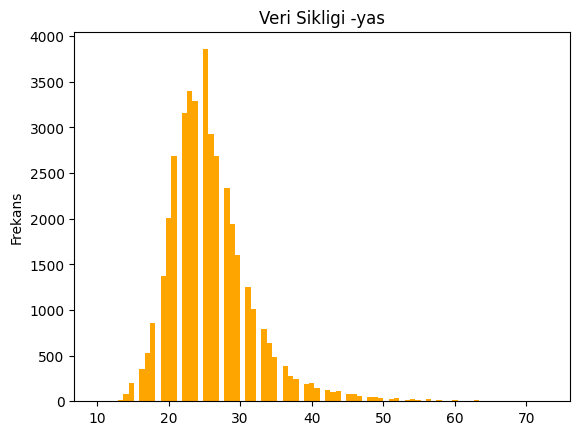

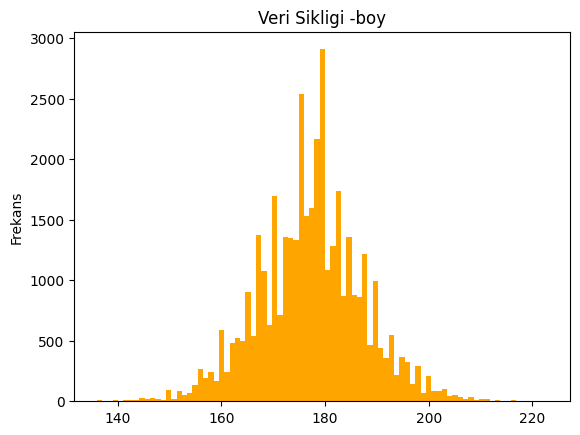

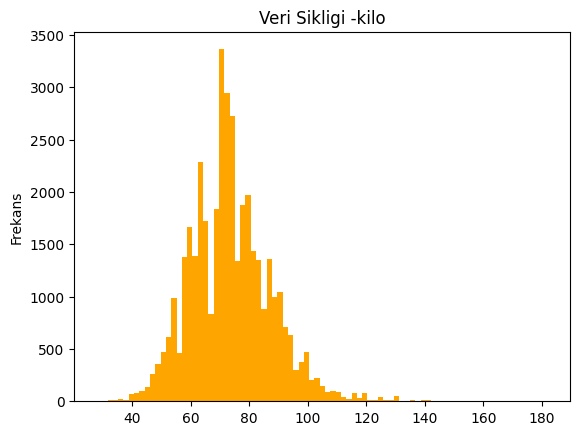

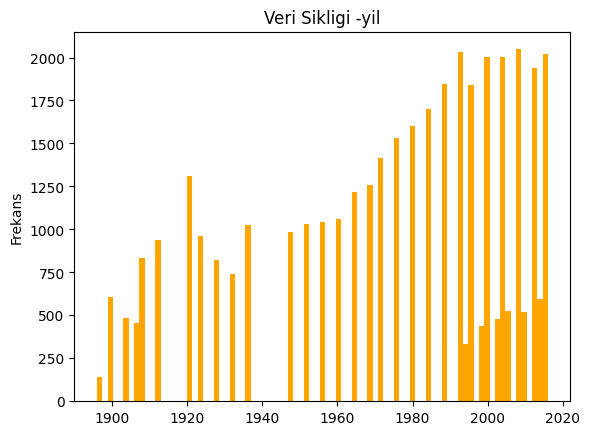

In [64]:
# Sayisal degiskenler icin Histogram Grafigi Cizdirelim

sayisal_degisken = ["yas","boy", "kilo", "yil"]
for i in sayisal_degisken:
    plotHistogram(i)

In [65]:
# Veriyi inceleyelim
veri.describe()

,yas,boy,kilo,yil
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


Kutu Grafigi Cizdirme

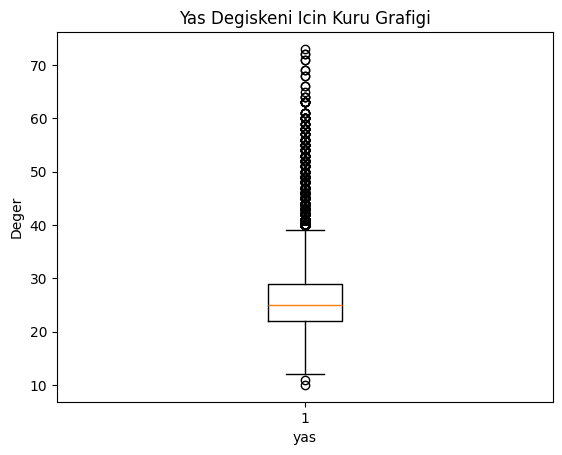

In [66]:
plt.boxplot(veri.yas)
plt.title("Yas Degiskeni Icin Kuru Grafigi")
plt.xlabel("yas")
plt.ylabel("Deger")
plt.show()

Kategorik degiskenler 

In [67]:
# bar grafik fonksiyonu
def plotBar(degisken, n=5):

    """

    Girdi: Degisken / sütun ismi
            n = en önemli 5 essiz deger
    Cikti: Bar grafigi
    """
    veri_ = veri[degisken]
    veri_sayma = veri_.value_counts() # o sütunda kac adet veri var? 
    veri_sayma = veri_sayma[:n] # ilk n tanesini cizecek
    
    plt.figure()
    plt.bar(veri_sayma.index, veri_sayma, color= "orange") # veri_sayma.index ile verilerin etiketlerini aliyoruz 
    plt.xticks(veri_sayma.index, veri_sayma.index.values)  # yatay eksende yazdirilacak
    plt.xticks(rotation = 45) # 45 derece aci ile yazilacak 
    plt.ylabel("Frekans")
    plt.title("Veri Sikligi -{}".format(degisken))
    plt.show()

    print("{}: \n {}".format(degisken,veri_sayma))

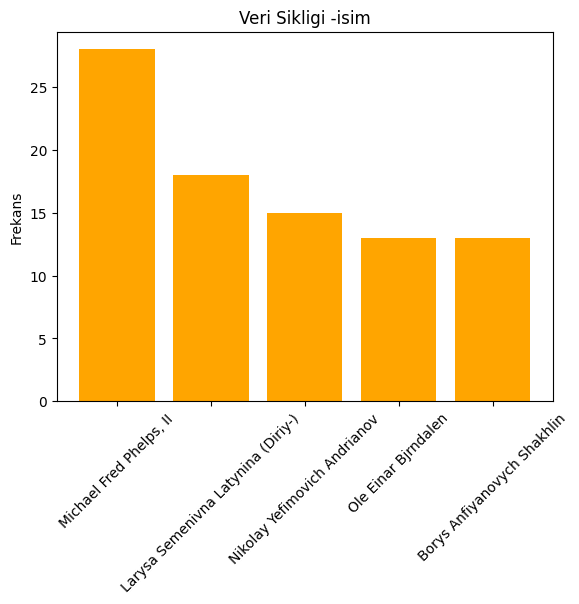

isim: 
 isim
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Borys Anfiyanovych Shakhlin           13
Name: count, dtype: int64


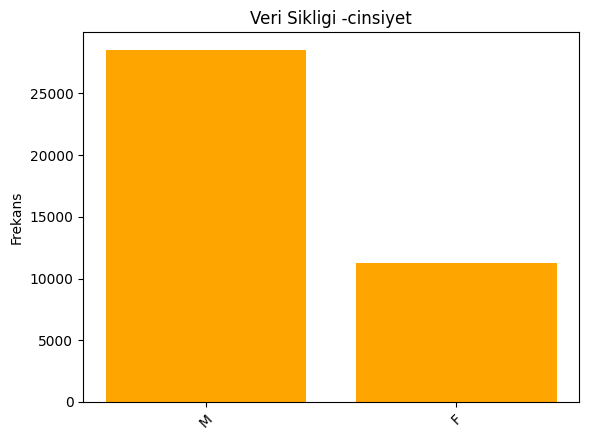

cinsiyet: 
 cinsiyet
M    28530
F    11253
Name: count, dtype: int64


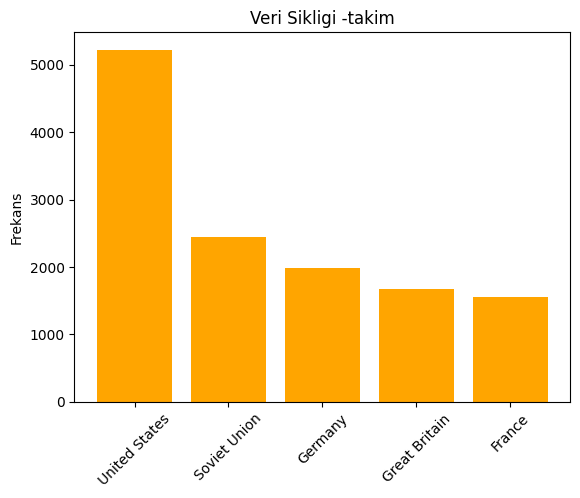

takim: 
 takim
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64


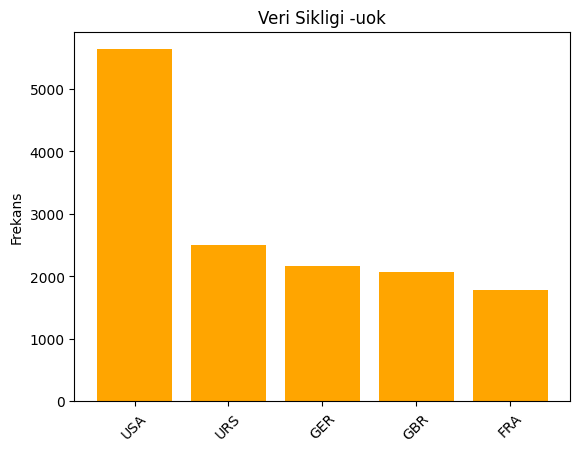

uok: 
 uok
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64


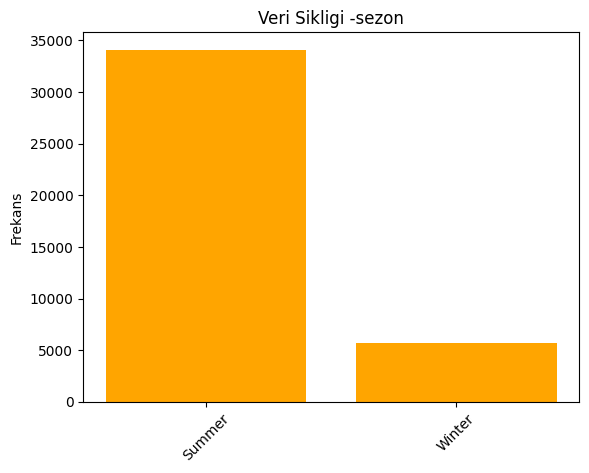

sezon: 
 sezon
Summer    34088
Winter     5695
Name: count, dtype: int64


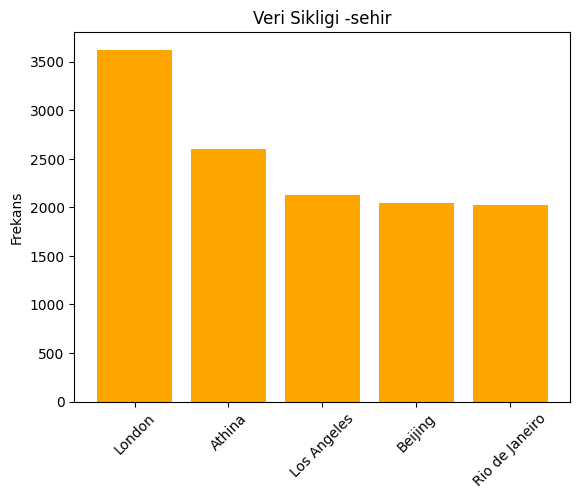

sehir: 
 sehir
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64


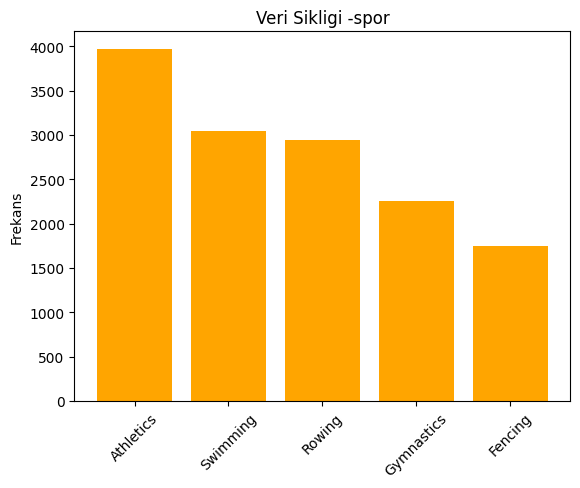

spor: 
 spor
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64


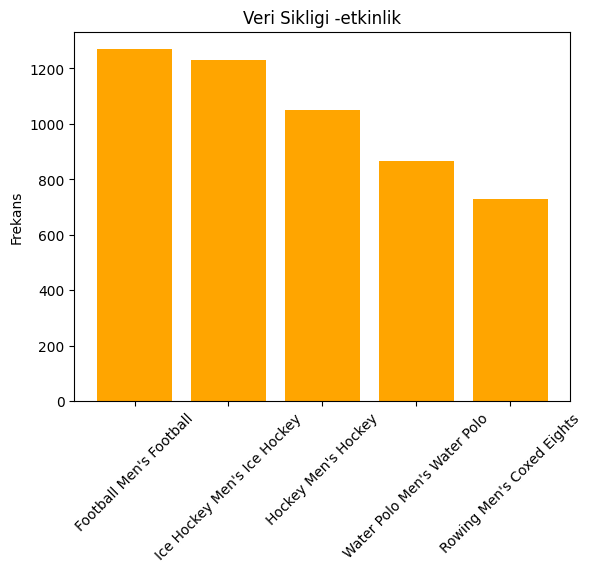

etkinlik: 
 etkinlik
Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: count, dtype: int64


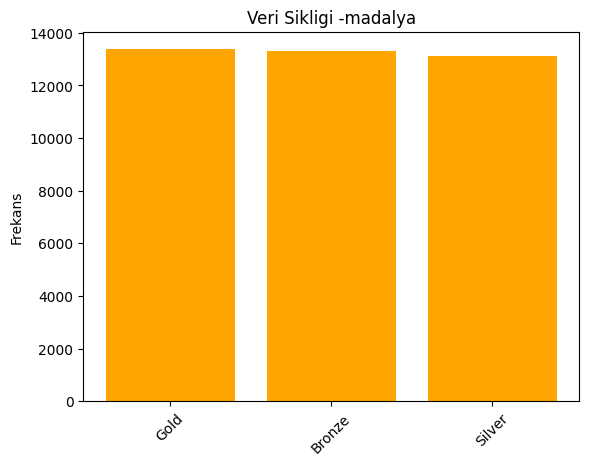

madalya: 
 madalya
Gold      13372
Bronze    13295
Silver    13116
Name: count, dtype: int64


In [68]:
# Kategorik Degikenler icin grafik cizdirme 
kategorik_degisken = ["isim", "cinsiyet", "takim", "uok", "sezon", "sehir", "spor", "etkinlik", "madalya"]

for i in kategorik_degisken:
    plotBar(i)


İki Değişkenli Veri Analizi 

In [69]:
erkek = veri[veri.cinsiyet =="M"]
erkek.head()


,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [70]:
kadin = veri[veri.cinsiyet == "F"]
kadin.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze
163,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.00,80.00,Russia,RUS,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver


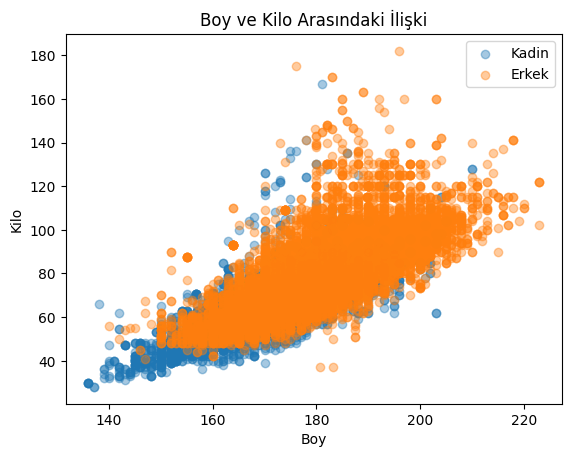

In [71]:
# Kadın ve erkekler arasında boy ilişkisine bakalım
# Scatter Plot

plt.figure()
plt.scatter(kadin.boy, kadin.kilo, alpha=0.4, label = "Kadin")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label ="Erkek")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

İki Değişkenli Veri Analzi - Detaylı Analiz



In [5]:
# Yas, Boy, Kilo Korelasyon
# Sayısal verıler arasındaki ilişki incelemesi
veri.loc[:,["yas","boy","kilo"]].corr() # korelasyon tablosu

KeyError: "None of [Index(['yas', 'boy', 'kilo'], dtype='object')] are in the [columns]"

In [73]:
veri

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,Olesya Nikolayevna Zykina,F,19.0,171.00,64.00,Russia,RUS,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [74]:
# Madalya ve Yas arasındaki Korelasyon Kontrolü

# altın, gümüş ve bronz olarak 3 e ayıralım
veri_temporary = veri.copy()
veri_temporary = pd.get_dummies(veri_temporary, columns = ["madalya"])  # Madalya sütununu alt dallarına göre ayırmak 
veri_temporary.head(2)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False


In [75]:
veri_temporary.loc[:,[ "yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


In [76]:
veri_temporary[["sehir","madalya_Gold","madalya_Bronze","madalya_Silver"]].groupby(["sehir"],as_index = False).sum().sort_values(by ="madalya_Gold",ascending = False)[:10]


,sehir,madalya_Gold,madalya_Bronze,madalya_Silver
17,London,1215,1214,1195
3,Athina,883,860,859
18,Los Angeles,726,706,691
6,Beijing,671,710,667
27,Rio de Janeiro,665,703,655
38,Sydney,663,680,661
4,Atlanta,608,629,605
5,Barcelona,559,604,549
33,Seoul,520,549,513
2,Antwerpen,493,367,448


Çok Değişkenli Veri Analizi

In [77]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31,155,-330]
ages_toplam = sum(ages)
ages_eleman_sayisi = len(ages)
ortalama =ages_toplam/ages_eleman_sayisi
yuzde75 = np.percentile(ages,75) # Insanların %75'inden fazlası 43.0 yasında veya daha kücük, üst sınır yani
yuzde25 = np.percentile(ages,25) #
print("%75: {}".format(yuzde75))
print("%25: {}".format(yuzde25))
IQRe = yuzde75-yuzde25
aykiri_Deger = 1.5 * IQRe
print(aykiri_Deger)
liste = []
liste2 = []
for i in ages:
    if (i > yuzde75+aykiri_Deger) | (i< yuzde25-aykiri_Deger):
        liste2.append(i)

# Aykırı değerler 

for i in ages:
    if (i > yuzde75) | (i< yuzde25):
        liste.append(i)

print(liste)
print(liste2)

%75: 45.5
%25: 9.5
54.0
[5, 48, 50, 7, 80, 82, 2, 8, 6, 61, 155, -330]
[155, -330]


In [78]:
def anomaliTespiti(df,ozellik):
    outlier_indices = []

    for c in ozellik:
        #1. Ceyrek
        Q1 = np.percentile(df[c],25)
        #print("C: {}".format(c))
        #print("dfC: {}".format(df[c]))
        #print("Q1: {}".format(Q1))
        #3. Ceyrek
        Q3 = np.percentile(df[c],75)
        #print("Q3: {}".format(Q3))
        #IQR: Çeyrekler Açıklığı
        IQR = Q3-Q1
        #print("IQR: {}".format(IQR))
        #Aykırı Değer tespiti için çarpan
        outlier_step = 1.5* IQR
        #print("Outlier_step: {}".format(outlier_step))
        #Aykırıyı ve aykırı indeksi tespit et
        outlier_list_col = df[(df[c]<Q1-outlier_step)|(df[c]>Q3 + outlier_step)].index
        #print("Outlier_list_col: {}".format(outlier_list_col))
        #indexleri depola
        outlier_indices.extend(outlier_list_col)
    #eşsiz aykırı değerleri bul
    outlier_indices = Counter(outlier_indices)
    print("outlier indices {}".format(outlier_indices))
    #Eğer bir örnek (v) 1 farklı sütun için aykırı değerse bunu aykırı olarak kabule et (v>1)
    multiple_outliers = list (i for i, v in outlier_indices.items()if v>1 )
    print("Multiple outliers {}".format(multiple_outliers))
    return multiple_outliers


In [79]:
veri_anomali = veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]

print("Sehirler: \n{}".format(veri_anomali.sehir.value_counts()))
print("Spor Türleri: \n{}".format(veri_anomali.spor.value_counts()))
#veri_anomali.spor.value_counts()


outlier indices Counter({48127: 2, 139072: 2, 154308: 2, 154522: 2, 192604: 2, 240082: 2, 260910: 2, 8834: 2, 8835: 2, 13741: 2, 21260: 2, 21577: 2, 21578: 2, 23763: 2, 25598: 2, 25599: 2, 40096: 2, 45521: 2, 47452: 2, 53751: 2, 53759: 2, 56213: 2, 56214: 2, 58429: 2, 62000: 2, 62001: 2, 62002: 2, 69216: 2, 69222: 2, 69225: 2, 76749: 2, 76750: 2, 76752: 2, 76753: 2, 76754: 2, 80497: 2, 80498: 2, 80499: 2, 80501: 2, 82013: 2, 83767: 2, 91278: 2, 92622: 2, 92623: 2, 92625: 2, 95006: 2, 96747: 2, 99392: 2, 106826: 2, 108408: 2, 109857: 2, 110505: 2, 114703: 2, 120874: 2, 123021: 2, 123433: 2, 124062: 2, 125769: 2, 125770: 2, 127690: 2, 127691: 2, 127692: 2, 129940: 2, 133000: 2, 136481: 2, 138311: 2, 140225: 2, 142944: 2, 143279: 2, 143280: 2, 144630: 2, 149233: 2, 160009: 2, 160920: 2, 163298: 2, 164563: 2, 164743: 2, 169850: 2, 174728: 2, 174729: 2, 176175: 2, 177224: 2, 181241: 2, 191397: 2, 192136: 2, 192138: 2, 192140: 2, 195659: 2, 197999: 2, 203727: 2, 207373: 2, 207374: 2, 207375:

Zaman Serilerinde Veri Analizi  

In [80]:
veri_zaman = veri.copy() # verinin orijinal halini kopyalıyoruz
veri_zaman.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [81]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [82]:
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

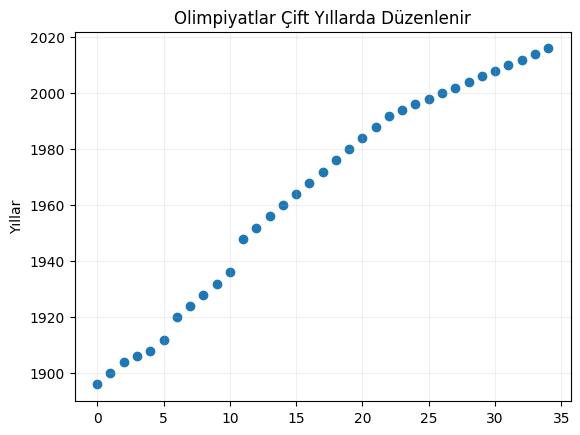

In [83]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array) # range dizinin boyutu kadar değer üretir 0,1,2,3 ..... en son değere kadar
plt.grid(True, alpha=0.2)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [84]:
# Tarih saat nesnesi oluşturma 

tarih_saat_nesnesi = pd.to_datetime(veri_zaman['yil'],format = '%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


3    1900-01-01
37   1920-01-01
38   1920-01-01
Name: yil, dtype: datetime64[ns]

In [85]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [86]:
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"], axis=1, inplace=True)
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


Yıllara Göre Ortalama Yaş,Boy, Kilo Değişimi

In [89]:
periyodik_veri = veri_zaman.resample("A") # 2 yıllık periyotlar halinde ortalamaları al 
periyodik_veri